# EBAY SCRAPING PROJECT

Web scraping is a process of generating data from a website which in our case is Ebay(an online database of information related to watches, jewelry, camera, sports equipments, where you can bid your stuff and you also participate in bidding to buy stuff).

Internet can be a amazing source of data to do various kind of data analysis , web scraping is a skill which helps us to do exactly that. The process used in ***this project is completely legal and is my own work, although I have used sites such as stackoverflow to make my code more optimized***

# OBJECTIVE

There are two objectives of this project, one being showcasing my web scraping skill and the other is to do some exploratory data analysis and try to find some inference on the data scraped.

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas, BeautifulSoup, seaborn and function to easily scrape data from the ebay website. We will be web scraping title, soldprice, sold date, bids, link and perform a quick data exploration on it.

# LIBRARIES USED ARE AS FOLLOWS

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# THE LINK FROM WHICH THE DATA IS SCRAPED

In [2]:
url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=watches&_sacat=0&LH_PrefLoc=98&_udhi=999&LH_Auction=1&rt=nc&LH_Sold=1&LH_Complete=1'

In [3]:
def get_data(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

<p>ATTRIBUTES I WILL SCRAPE ARE:<br>
<p>Title<br>
SoldDate<br>
SoldPrice<br>
Bids<br>
Link<br>

In [4]:
def parse(soup):
    results = soup.find_all('div', {'class': 's-item__info clearfix'})[1:]
    title = []
    soldprice = []
    solddate = []
    bids = []
    link = []
    for i in range(20):
        title.append(results[i+1].find('h3', {'class': 's-item__title s-item__title--has-tags'}).text),
        soldprice.append(float(results[i+1].find('span',{'class': 's-item__price'}).text.replace('$','').replace(',','').strip())),
        try:
            solddate.append(results[i+1].find('span').text),
        except Exception as e:
            solddate.append('NULL')
        bids.append(results[i+1].find('span',{'class' : 's-item__bids s-item__bidCount'}).text),
        link.append(results[i+1].find('a', {'class': 's-item__link'})['href']),
    return(pd.DataFrame({ 'title':title,
                'soldprice':soldprice,
                   'solddate': solddate,
                     'bids':bids,
                        'link': link}))
soup = get_data(url)
productslist = parse(soup)

# LIST OF PRODUCTS ARE

In [5]:
productslist

,title,soldprice,solddate,bids,link
0,RARE SWATCH Chrono Irony Diaphane Orizontas SV...,41.00,"Sold Jun 11, 2022",13 bids,https://www.ebay.com/itm/185397194892?epid=170...
1,Vtg Raymond Weil Geneve 9056 Two Tone 18k Gold...,395.00,"Sold Jun 11, 2022",66 bids,https://www.ebay.com/itm/185405694465?hash=ite...
2,Casio Wave Ceptor Solar Analog/Digi WVA-430J 3...,27.27,"Sold Jun 11, 2022",9 bids,https://www.ebay.com/itm/403697985087?epid=604...
3,Vintage ROAMER Popular Elegant Incabloc 17 Jew...,128.88,"Sold Jun 11, 2022",19 bids,https://www.ebay.com/itm/185412329167?hash=ite...
4,Vintage Pulsar GOLD Ref V789.5A00 Stainless St...,10.00,"Sold Jun 11, 2022",15 bids,https://www.ebay.com/itm/185405924911?hash=ite...
5,Lot of parts- Dial movements and cases for wat...,303.99,"Sold Jun 11, 2022",28 bids,https://www.ebay.com/itm/394108161157?hash=ite...
6,1971 Men's Seiko Automatic 7006-8029 (Runs) Wi...,44.95,"Sold Jun 11, 2022",1 bid,https://www.ebay.com/itm/225017621312?hash=ite...
7,****Authentic box For AMG Panerai,150.00,"Sold Jun 11, 2022",1 bid,https://www.ebay.com/itm/314028120662?hash=ite...
8,OCEAN CRAWLER CORE DIVER V3 SWISS AUTOMATIC WA...,600.00,"Sold Jun 11, 2022",1 bid,https://www.ebay.com/itm/203980067789?hash=ite...
9,"DEEP BLUE SPEEDOGRAPH 1000 SWISS AUTOMATIC, SA...",304.00,"Sold Jun 11, 2022",2 bids,https://www.ebay.com/itm/203974956281?hash=ite...


In [6]:
df = productslist

NOW I WILL DO SOME DATA CLEANING 

In [7]:
df[["new bids", "string"]] = df["bids"].str.split(" ",expand = True,)
df.drop(["bids", "string"], axis=1, inplace=True)
df.rename({"new bids":"bids"}, axis=1, inplace = True)
df["bids"]=df.bids.astype("int32")
df

,title,soldprice,solddate,link,bids
0,RARE SWATCH Chrono Irony Diaphane Orizontas SV...,41.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185397194892?epid=170...,13
1,Vtg Raymond Weil Geneve 9056 Two Tone 18k Gold...,395.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405694465?hash=ite...,66
2,Casio Wave Ceptor Solar Analog/Digi WVA-430J 3...,27.27,"Sold Jun 11, 2022",https://www.ebay.com/itm/403697985087?epid=604...,9
3,Vintage ROAMER Popular Elegant Incabloc 17 Jew...,128.88,"Sold Jun 11, 2022",https://www.ebay.com/itm/185412329167?hash=ite...,19
4,Vintage Pulsar GOLD Ref V789.5A00 Stainless St...,10.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405924911?hash=ite...,15
5,Lot of parts- Dial movements and cases for wat...,303.99,"Sold Jun 11, 2022",https://www.ebay.com/itm/394108161157?hash=ite...,28
6,1971 Men's Seiko Automatic 7006-8029 (Runs) Wi...,44.95,"Sold Jun 11, 2022",https://www.ebay.com/itm/225017621312?hash=ite...,1
7,****Authentic box For AMG Panerai,150.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/314028120662?hash=ite...,1
8,OCEAN CRAWLER CORE DIVER V3 SWISS AUTOMATIC WA...,600.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/203980067789?hash=ite...,1
9,"DEEP BLUE SPEEDOGRAPH 1000 SWISS AUTOMATIC, SA...",304.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/203974956281?hash=ite...,2


# SOME BASIC STATISTICS OF THE DATA

In [8]:
df.shape

(20, 5)

In [9]:
df.columns

Index(['title', 'soldprice', 'solddate', 'link', 'bids'], dtype='object')

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df["bids"].max()

66

In [12]:
df["soldprice"].max()

600.0

In [13]:
df["soldprice"].min()

8.9

In [14]:
df.describe()

,soldprice,bids
count,20.000000,20.000000
mean,142.249000,11.100000
std,187.870837,15.440548
min,8.900000,1.000000
25%,16.375000,1.000000
50%,42.975000,5.500000
75%,188.497500,16.000000
max,600.000000,66.000000


In [15]:
df[df.soldprice>=100]

,title,soldprice,solddate,link,bids
1,Vtg Raymond Weil Geneve 9056 Two Tone 18k Gold...,395.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405694465?hash=ite...,66
3,Vintage ROAMER Popular Elegant Incabloc 17 Jew...,128.88,"Sold Jun 11, 2022",https://www.ebay.com/itm/185412329167?hash=ite...,19
5,Lot of parts- Dial movements and cases for wat...,303.99,"Sold Jun 11, 2022",https://www.ebay.com/itm/394108161157?hash=ite...,28
7,****Authentic box For AMG Panerai,150.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/314028120662?hash=ite...,1
8,OCEAN CRAWLER CORE DIVER V3 SWISS AUTOMATIC WA...,600.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/203980067789?hash=ite...,1
9,"DEEP BLUE SPEEDOGRAPH 1000 SWISS AUTOMATIC, SA...",304.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/203974956281?hash=ite...,2
12,Omega X Swatch MoonSwatch Mission to Mars New ...,560.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/325214738858?hash=ite...,20


In [16]:
df[df.bids>=5]

,title,soldprice,solddate,link,bids
0,RARE SWATCH Chrono Irony Diaphane Orizontas SV...,41.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185397194892?epid=170...,13
1,Vtg Raymond Weil Geneve 9056 Two Tone 18k Gold...,395.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405694465?hash=ite...,66
2,Casio Wave Ceptor Solar Analog/Digi WVA-430J 3...,27.27,"Sold Jun 11, 2022",https://www.ebay.com/itm/403697985087?epid=604...,9
3,Vintage ROAMER Popular Elegant Incabloc 17 Jew...,128.88,"Sold Jun 11, 2022",https://www.ebay.com/itm/185412329167?hash=ite...,19
4,Vintage Pulsar GOLD Ref V789.5A00 Stainless St...,10.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405924911?hash=ite...,15
5,Lot of parts- Dial movements and cases for wat...,303.99,"Sold Jun 11, 2022",https://www.ebay.com/itm/394108161157?hash=ite...,28
12,Omega X Swatch MoonSwatch Mission to Mars New ...,560.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/325214738858?hash=ite...,20
15,timex expedition indiglo 30m mens anadigi wat...,27.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/334464347479?hash=ite...,11
16,VINTAGE ESTATE BENRUS 10KT GOLD ROLLED MAN WATCH,22.50,"Sold Jun 11, 2022",https://www.ebay.com/itm/275334738589?hash=ite...,9
17,"MENS 1966 LONGINES 10K GF 17J 370 WRISTWATCH,RUNS",79.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/384924888286?hash=ite...,20


In [17]:
df[df.soldprice==df.soldprice.max()]

,title,soldprice,solddate,link,bids
8,OCEAN CRAWLER CORE DIVER V3 SWISS AUTOMATIC WA...,600.0,"Sold Jun 11, 2022",https://www.ebay.com/itm/203980067789?hash=ite...,1


In [18]:
df[["title","soldprice"]][df.soldprice==df['soldprice'].max()]

,title,soldprice
8,OCEAN CRAWLER CORE DIVER V3 SWISS AUTOMATIC WA...,600.0


In [19]:
df.head()

,title,soldprice,solddate,link,bids
0,RARE SWATCH Chrono Irony Diaphane Orizontas SV...,41.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185397194892?epid=170...,13
1,Vtg Raymond Weil Geneve 9056 Two Tone 18k Gold...,395.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405694465?hash=ite...,66
2,Casio Wave Ceptor Solar Analog/Digi WVA-430J 3...,27.27,"Sold Jun 11, 2022",https://www.ebay.com/itm/403697985087?epid=604...,9
3,Vintage ROAMER Popular Elegant Incabloc 17 Jew...,128.88,"Sold Jun 11, 2022",https://www.ebay.com/itm/185412329167?hash=ite...,19
4,Vintage Pulsar GOLD Ref V789.5A00 Stainless St...,10.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/185405924911?hash=ite...,15


In [23]:
df.tail()

,title,soldprice,solddate,link,bids
15,timex expedition indiglo 30m mens anadigi wat...,27.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/334464347479?hash=ite...,11
16,VINTAGE ESTATE BENRUS 10KT GOLD ROLLED MAN WATCH,22.50,"Sold Jun 11, 2022",https://www.ebay.com/itm/275334738589?hash=ite...,9
17,"MENS 1966 LONGINES 10K GF 17J 370 WRISTWATCH,RUNS",79.00,"Sold Jun 11, 2022",https://www.ebay.com/itm/384924888286?hash=ite...,20
18,ESTATE 1960s TIMEX GOLD WIND-UP WATCH,9.99,"Sold Jun 11, 2022",https://www.ebay.com/itm/275334732695?hash=ite...,1
19,anne klein swiss ladies fashion watch 753S/3,8.90,"Sold Jun 11, 2022",https://www.ebay.com/itm/334464324565?hash=ite...,1


# NOW I WILL PLOT SOME GRAPHS FOR BETTER UNDERSTANDING

<AxesSubplot:xlabel='title'>

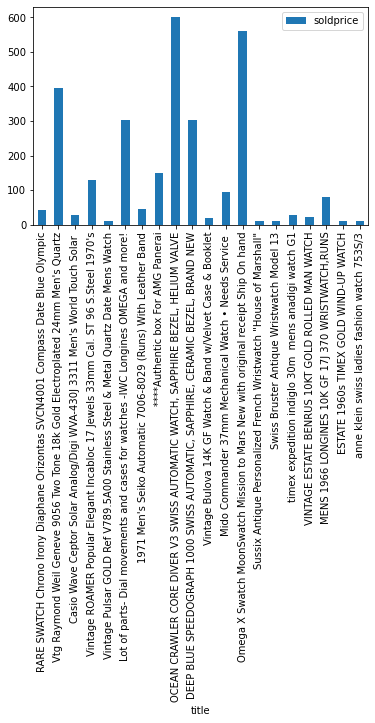

In [20]:
df.plot(x="title", y="soldprice", kind="bar")

C:\Users\khize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='soldprice'>

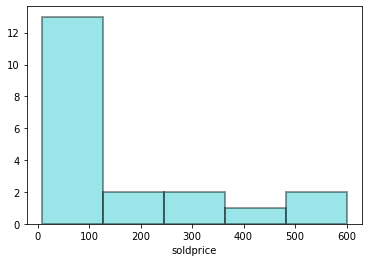

In [21]:
sns.distplot(df.soldprice,
             kde=False,
             hist_kws=dict(edgecolor="black",linewidth=2),
             color='#00BFC4')

<AxesSubplot:xlabel='bids'>

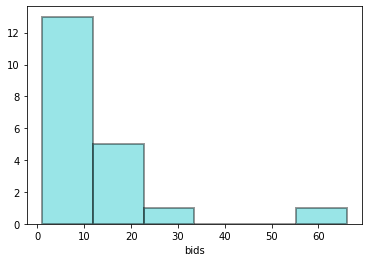

In [22]:
sns.distplot(df.bids,
             kde=False,
             hist_kws=dict(edgecolor="black",linewidth=2),
             color='#00BFC4')

# THE END